### Import Helper Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'Set1' , 
             rc = {'figure.figsize' : (8 , 4)})

In [4]:
%matplotlib inline 

In [5]:
df = pd.read_csv('Iris.csv')

### Drop ID & Target (this is unsupervised Problem (Clustring))

In [6]:
df.drop(['Species' , 'Id'] , inplace = True , axis = 1)

### Check data info for missing records and show feature data types 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### No null values 

In [8]:
df.isnull().mean()*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

### There are 3 duplicated records 
* Drop them 

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace = True , ignore_index = True)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

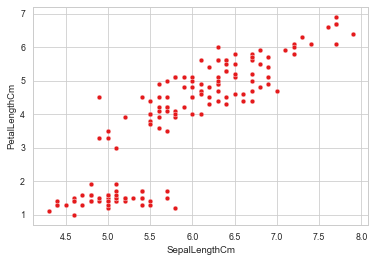

In [11]:
sns.scatterplot(data = df , x = df['SepalLengthCm'] , y = df['PetalLengthCm'])

### Show correlation between features 

<AxesSubplot:>

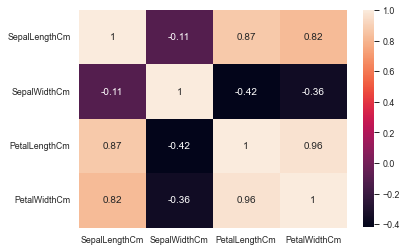

In [12]:
sns.heatmap(df.corr() , annot = True)

In [13]:
wcss = []

### Try K-Means with different number of clusters 

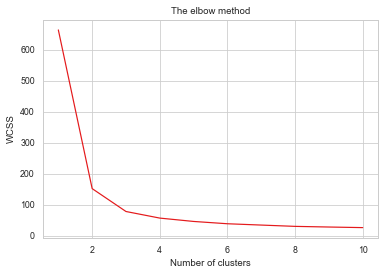

In [14]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df.values)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Apply K-Means with 3 clusters 

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df.values)

### Show our cluster 

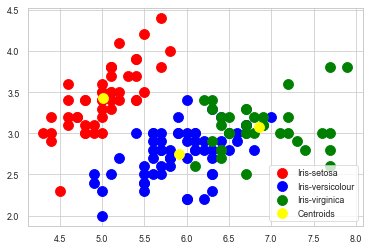

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(df.values[y_kmeans == 0, 0], df.values[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df.values[y_kmeans == 1, 0], df.values[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df.values[y_kmeans == 2, 0], df.values[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()